<p><font size="6"><b>CASE - Observation data</b></font></p>

> *© 2021, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

## Introduction

Observation data of species (when and where is a given species observed) is typical in biodiversity studies. Large international initiatives support the collection of this data by volunteers, e.g. [iNaturalist](https://www.inaturalist.org/). Thanks to initiatives like [GBIF](https://www.gbif.org/), a lot of these data is also openly available. 

In this example, data originates from a [study](http://esapubs.org/archive/ecol/E090/118/metadata.htm) of a Chihuahuan desert ecosystem near Portal, Arizona. It is a long-term observation study in 24 different plots (each plot identified with a `verbatimLocality` identifier) and defines, apart from the species, location and date of the observations, also the sex and the weight (if available).

The data consists of two data sets:

1. `observations.csv` the individual observations.
2. `species_names.csv` the overview list of the species names.

Let's start with the observations data!

## Reading in the observations data

<div class="alert alert-success">

**EXERCISE**

- Read in the `data/observations.csv` file with Pandas and assign the resulting DataFrame to a variable with the name `observations`.
- Make sure the 'occurrenceID' column is used as the index of the resulting DataFrame while reading in the data set.
- Inspect the first five rows of the DataFrame and the data types of each of the data columns.

<details><summary>Hints</summary>
    
- All read functions in Pandas start with `pd.read_...`.
- Setting a column as index can be done with an argument of the `read_csv` function To check the documentation of a function, use the keystroke combination of SHIFT + TAB when the cursor is on the function.
- Remember `.head()` and `.info()`?
    
</details>

In [2]:
observations = pd.read_csv("data/observations.csv", index_col="occurrenceID")

In [3]:
observations.head()

,verbatimLocality,verbatimSex,weight,decimalLongitude,decimalLatitude,species_ID,day,month,year
occurrenceID,,,,,,,,,
1,2,M,NaN,-109.081975,31.938887,NaN,16,7,1977
2,3,M,NaN,-109.081208,31.938896,NaN,16,7,1977
3,2,F,NaN,-109.081975,31.938887,2439521.0,16,7,1977
4,7,M,NaN,-109.082816,31.938113,2439521.0,16,7,1977
5,3,M,NaN,-109.081208,31.938896,2439521.0,16,7,1977


In [4]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35550 entries, 1 to 35550
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   verbatimLocality  35550 non-null  int64  
 1   verbatimSex       33042 non-null  object 
 2   weight            32283 non-null  float64
 3   decimalLongitude  35550 non-null  float64
 4   decimalLatitude   35550 non-null  float64
 5   species_ID        33448 non-null  float64
 6   day               35550 non-null  int64  
 7   month             35550 non-null  int64  
 8   year              35550 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 2.7+ MB


<div class="alert alert-success">

**EXERCISE**

Create a new column with the name `eventDate` which contains datetime-aware information of each observation. To do so, combine the columns `day`, `month` and `year` into a datetime-aware data type by using the `pd.to_datetime` function from Pandas (check the help of that function to see how multiple columns with the year, month and day can be converted).

<details><summary>Hints</summary>

- `pd.to_datetime` can automatically combine the information from multiple columns. To select multiple columns, use a list of column names, e.g. `df[["my_col1", "my_col2"]]`
- To create a new column, assign the result to new name, e.g. `df["my_new_col"] = df["my_col"] + 1`
    
</details>

In [5]:
observations["eventDate"] =  pd.to_datetime(observations[["year", "month", "day"]])
observations

,verbatimLocality,verbatimSex,weight,decimalLongitude,decimalLatitude,species_ID,day,month,year,eventDate
occurrenceID,,,,,,,,,,
1,2,M,NaN,-109.081975,31.938887,NaN,16,7,1977,1977-07-16
2,3,M,NaN,-109.081208,31.938896,NaN,16,7,1977,1977-07-16
3,2,F,NaN,-109.081975,31.938887,2439521.0,16,7,1977,1977-07-16
4,7,M,NaN,-109.082816,31.938113,2439521.0,16,7,1977,1977-07-16
5,3,M,NaN,-109.081208,31.938896,2439521.0,16,7,1977,1977-07-16
...,...,...,...,...,...,...,...,...,...,...
35546,15,NaN,NaN,-109.081036,31.937059,2437568.0,31,12,2002,2002-12-31
35547,15,NaN,NaN,-109.081036,31.937059,2437568.0,31,12,2002,2002-12-31
35548,10,F,14.0,-109.080091,31.938017,2437874.0,31,12,2002,2002-12-31


<div class="alert alert-success">

**EXERCISE**

For convenience when this dataset will be combined with other datasets, add a new column, `datasetName`, to the survey data set with `"Ecological Archives E090-118-D1."` as value for each of the individual records (static value for the entire data set)

<details><summary>Hints</summary>

- Pandas will automatically broadcast a single string value to each of the rows in the DataFrame.
    
</details>

In [6]:
observations["datasetName"] = "Ecological Archives E090-118-D1."

## Cleaning the `verbatimSex` column

In [7]:
observations["verbatimSex"].unique()

array(['M', 'F', nan, 'R', 'P', 'Z'], dtype=object)

For the further analysis (and the species concerned in this specific data set), the `sex` information should be either `male` or `female`. We want to create a new column, named `sex` and convert the current values to the corresponding sex, taking into account the following mapping:
* `M` -> `male`
* `F` -> `female`
* `R` -> `male`
* `P` -> `female`
* `Z` -> nan

<div class="alert alert-success">

**EXERCISE**

- Express the mapping of the values (e.g. `M` -> `male`) into a Python dictionary object with the variable name `sex_dict`. `Z` values correspond to _Not a Number_, which can be defined as `np.nan`. 
- Use the `sex_dict` dictionary to replace the values in the `verbatimSex` column to the new values and save the mapped values in a new column 'sex' of the DataFrame.
- Check the conversion by printing the unique values within the new column `sex`.

<details><summary>Hints</summary>
    
- A dictionary is a Python data structure, https://docs.python.org/3/tutorial/datastructures.html#dictionaries
    
</details>

In [8]:
sex_dict = {"M": "male",
            "F": "female",
            "R": "male",
            "P": "female",
            "Z": np.nan}

In [9]:
observations['sex'] = observations['verbatimSex'].replace(sex_dict)

In [10]:
observations["sex"].unique()

array(['male', 'female', nan], dtype=object)

## Tackle missing values (NaN) and duplicate values

See [pandas_08_missing_values.ipynb](pandas_08_missing_values.ipynb) for an overview of functionality to work with missing values.

<div class="alert alert-success">

**EXERCISE**

How many records in the data set have no information about the `species_ID`? Use the `isna()` method to find out.

<details><summary>Hints</summary>
    
- Do NOT use `observations['species_ID'] == np.nan`, but use the available method `isna()` to check if a value is NaN
- The result of an (element-wise) condition returns a set of True/False values, corresponding to 1/0 values. The amount of True values is equal to the sum.
    
</details>

In [11]:
observations['species_ID'].isna().sum()

2102

<div class="alert alert-success">

**EXERCISE**

How many duplicate records are present in the dataset? Use the method `duplicated()` to check if a row is a duplicate.

<details><summary>Hints</summary>
    
- The result of an (element-wise) condition returns a set of True/False values, corresponding to 1/0 values. The amount of True values is equal to the sum.
    
</details>

In [12]:
observations.duplicated().sum()

1579

<div class="alert alert-success">

**EXERCISE**

- Select all duplicate data by filtering the `observations` data and assign the result to a new variable `duplicate_observations`. The `duplicated()` method provides an `keep` argument define which duplicates (if any) to mark.
- Sort the `duplicate_observations` data on both the columns `eventDate` and `verbatimLocality` and show the first 9 records.

<details><summary>Hints</summary>
    
- Check the documentation of the `duplicated` method to find out which value the argument `keep` requires to select all duplicate data.
- `sort_values()` can work with a single columns name as well as a list of names.
    
</details>

In [13]:
duplicate_observations = observations[observations.duplicated(keep=False)]
duplicate_observations.sort_values(["eventDate", "verbatimLocality"]).head(9)

,verbatimLocality,verbatimSex,weight,decimalLongitude,decimalLatitude,species_ID,day,month,year,eventDate,datasetName,sex
occurrenceID,,,,,,,,,,,,
5,3,M,NaN,-109.081208,31.938896,2439521.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,male
14,3,M,NaN,-109.081208,31.938896,2439521.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,male
4,7,M,NaN,-109.082816,31.938113,2439521.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,male
13,7,M,NaN,-109.082816,31.938113,2439521.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,male
34,11,F,NaN,-109.079307,31.938056,2439521.0,17,7,1977,1977-07-17,Ecological Archives E090-118-D1.,female
38,11,F,NaN,-109.079307,31.938056,2439521.0,17,7,1977,1977-07-17,Ecological Archives E090-118-D1.,female
40,11,F,NaN,-109.079307,31.938056,2439521.0,17,7,1977,1977-07-17,Ecological Archives E090-118-D1.,female
27,15,M,NaN,-109.081036,31.937059,2439521.0,17,7,1977,1977-07-17,Ecological Archives E090-118-D1.,male
28,15,M,NaN,-109.081036,31.937059,2439521.0,17,7,1977,1977-07-17,Ecological Archives E090-118-D1.,male


<div class="alert alert-success">

**EXERCISE**

- Exclude the duplicate values (i.e. keep the first occurrence while removing the other ones) from the `observations` data set and save the result as `observations_unique`. Use the `drop duplicates()` method from Pandas.
- How many observations are still left in the data set?    

<details><summary>Hints</summary>
    
- `keep=First` is the default option for `drop_duplicates`
- The number of rows in a DataFrame is equal to the `len`gth    
    
</details>

In [14]:
observations_unique = observations.drop_duplicates()

In [15]:
len(observations_unique)

33971

<div class="alert alert-success">

**EXERCISE**

Use the `dropna()` method to find out:    

- For how many observations (rows) we have all the information available (i.e. no NaN values in any of the columns)? 
- For how many observations (rows) we do have the `species_ID` data available ? 
- Remove the data without `species_ID` data from the observations and assign the result to a new variable `observations_with_ID`

<details><summary>Hints</summary>
    
- `dropna` by default removes by default all rows for which _any_ of the columns contains a `NaN` value. 
- To specify which specific columns to check, use the `subset` argument
    
</details>

In [16]:
len(observations_unique.dropna())

29777

In [17]:
len(observations_unique.dropna(subset=['species_ID']))

31876

In [18]:
observations_with_ID = observations_unique.dropna(subset=['species_ID'])
observations_with_ID.head()

,verbatimLocality,verbatimSex,weight,decimalLongitude,decimalLatitude,species_ID,day,month,year,eventDate,datasetName,sex
occurrenceID,,,,,,,,,,,,
3,2,F,NaN,-109.081975,31.938887,2439521.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,female
4,7,M,NaN,-109.082816,31.938113,2439521.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,male
5,3,M,NaN,-109.081208,31.938896,2439521.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,male
6,1,M,NaN,-109.082829,31.938851,2439566.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,male
7,2,F,NaN,-109.081975,31.938887,2437981.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,female


<div class="alert alert-success">

**EXERCISE**

Filter the  `observations` data and select only those records that do not have a `species_ID` while having information on the `sex`. Store the result as variable `not_identified`.

<details><summary>Hints</summary>
    
- To combine logical operators element-wise in Pandas, use the `&` operator.
- Pandas provides both a `isna()` and a `notna()` method to check the existence of `NaN` values.
    
</details>

In [19]:
mask = observations['species_ID'].isna() & observations['sex'].notna()
not_identified = observations[mask]

In [20]:
not_identified.head()

,verbatimLocality,verbatimSex,weight,decimalLongitude,decimalLatitude,species_ID,day,month,year,eventDate,datasetName,sex
occurrenceID,,,,,,,,,,,,
1,2,M,NaN,-109.081975,31.938887,NaN,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,male
2,3,M,NaN,-109.081208,31.938896,NaN,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,male
23,15,F,NaN,-109.081036,31.937059,NaN,17,7,1977,1977-07-17,Ecological Archives E090-118-D1.,female
39,17,M,NaN,-109.079415,31.937117,NaN,17,7,1977,1977-07-17,Ecological Archives E090-118-D1.,male
71,3,F,22.0,-109.081208,31.938896,NaN,19,8,1977,1977-08-19,Ecological Archives E090-118-D1.,female


## Adding the names of the observed species

In [21]:
# Recap from previous exercises - remove duplicates and observations without species information
observations_unique_ = observations.drop_duplicates()
observations_data = observations_unique_.dropna(subset=['species_ID'])

In the data set `observations`, the column `specied_ID` provides only an identifier instead of the full name. The name information is provided in a separate file `species_names.csv`:

In [22]:
species_names = pd.read_csv("data/species_names.csv")
species_names.head()

,name,class,kingdom,order,phylum,scientificName,ID,taxa
0,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",2439521,Rodent
1,Perognathus flavus,Mammalia,Animalia,Rodentia,Chordata,"Perognathus flavus Baird, 1855",2439566,Rodent
2,Peromyscus eremicus,Mammalia,Animalia,Rodentia,Chordata,"Peromyscus eremicus (Baird, 1857)",2437981,Rodent
3,Sigmodon hispidus,Mammalia,Animalia,Rodentia,Chordata,"Sigmodon hispidus Say & Ord, 1825",2438147,Rodent
4,Dipodomys spectabilis,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys spectabilis Merriam, 1890",2439531,Rodent


The species names contains for each identifier in the `ID` column the scientific name of a species. The `species_names` data set contains in total 38 different scientific names:

In [23]:
species_names.shape

(38, 8)

For further analysis, let's combine both in a single DataFrame in the following exercise.

<div class="alert alert-success">

**EXERCISE**

Combine the DataFrames `observations` and `species_names` by adding the corresponding species name information (name, class, kingdom,..) to the individual observations using the `pd.merge()` function. Assign the output to a new variable `survey_data`.

<details><summary>Hints</summary>

- This is an example of a database JOIN operation. Pandas provides the `pd.merge` function to join two data sets using a common identifier.
- Take into account that our key-column is different for `observations` and `species_names`, respectively `specied_ID` and `ID`. The `pd.merge()` function has `left_on` and `right_on` keywords to specify the name of the column in the left and right dataframe to merge on.
    
</details>

In [24]:
survey_data = pd.merge(observations_data, species_names, how="left",
                       left_on="species_ID", right_on="ID")
survey_data

,verbatimLocality,verbatimSex,weight,decimalLongitude,decimalLatitude,species_ID,day,month,year,eventDate,datasetName,sex,name,class,kingdom,order,phylum,scientificName,ID,taxa
0,2,F,NaN,-109.081975,31.938887,2439521.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,female,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",2439521,Rodent
1,7,M,NaN,-109.082816,31.938113,2439521.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,male,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",2439521,Rodent
2,3,M,NaN,-109.081208,31.938896,2439521.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,male,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",2439521,Rodent
3,1,M,NaN,-109.082829,31.938851,2439566.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,male,Perognathus flavus,Mammalia,Animalia,Rodentia,Chordata,"Perognathus flavus Baird, 1855",2439566,Rodent
4,2,F,NaN,-109.081975,31.938887,2437981.0,16,7,1977,1977-07-16,Ecological Archives E090-118-D1.,female,Peromyscus eremicus,Mammalia,Animalia,Rodentia,Chordata,"Peromyscus eremicus (Baird, 1857)",2437981,Rodent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31871,15,F,29.0,-109.081036,31.937059,2439581.0,31,12,2002,2002-12-31,Ecological Archives E090-118-D1.,female,Chaetodipus baileyi,Mammalia,Animalia,Rodentia,Chordata,"Chaetodipus baileyi (Merriam, 1894)",2439581,Rodent
31872,15,F,34.0,-109.081036,31.937059,2439581.0,31,12,2002,2002-12-31,Ecological Archives E090-118-D1.,female,Chaetodipus baileyi,Mammalia,Animalia,Rodentia,Chordata,"Chaetodipus baileyi (Merriam, 1894)",2439581,Rodent
31873,15,NaN,NaN,-109.081036,31.937059,2437568.0,31,12,2002,2002-12-31,Ecological Archives E090-118-D1.,NaN,Ammospermophilus harrisi,Mammalia,Animalia,Rodentia,Chordata,"Ammospermophilus harrisii (Audubon & Bachman, ...",2437568,Rodent-not censused
31874,10,F,14.0,-109.080091,31.938017,2437874.0,31,12,2002,2002-12-31,Ecological Archives E090-118-D1.,female,Reithrodontomys megalotis,Mammalia,Animalia,Rodentia,Chordata,"Reithrodontomys megalotis (Baird, 1857)",2437874,Rodent


## Select subsets according to taxa of species

In [25]:
survey_data['taxa'].value_counts()
#survey_data.groupby('taxa').size()

Rodent                 30869
Rodent-not censused      595
Bird                     344
Rabbit                    59
Reptile                    9
Name: taxa, dtype: int64

<div class="alert alert-success">

**EXERCISE**

- Select the observations for which the `taxa` is equal to 'Rabbit', 'Bird' or 'Reptile'. Assign the result to a variable `non_rodent_species`. Use the `isin` method for the selection.

<details><summary>Hints</summary>

- You do not have to combine three different conditions, but use the `isin` operator with a list of names.
    
</details>

In [26]:
non_rodent_species = survey_data[survey_data['taxa'].isin(['Rabbit', 'Bird', 'Reptile'])]

In [27]:
len(non_rodent_species)

412

<div class="alert alert-success">

**EXERCISE**

Select the observations for which the `name` starts with the characters 'ro' (make sure it does not matter if a capital character is used in the 'taxa' name). Call the resulting variable `r_species`.

<details><summary>Hints</summary>

- Remember the `.str.` construction to provide all kind of string functionalities? You can combine multiple of these after each other.
- If the presence of capital letters should not matter, make everything lowercase first before comparing (`.lower()`)    
    
</details>

In [28]:
r_species = survey_data[survey_data['name'].str.lower().str.startswith('r')]

In [29]:
len(r_species)

2568

In [30]:
r_species["name"].value_counts()

Reithrodontomys megalotis     2485
Reithrodontomys fulvescens      75
Reithrodontomys montanus         8
Name: name, dtype: int64

<div class="alert alert-success">

**EXERCISE**

Select the observations that are not Birds. Call the resulting variable <code>non_bird_species</code>.

<details><summary>Hints</summary>

- Logical operators like `==`, `!=`, `>`,... can still be used.
    
</details>

In [31]:
non_bird_species = survey_data[survey_data['taxa'] != 'Bird']

In [32]:
len(non_bird_species)

31532

<div class="alert alert-success">

**EXERCISE**

Select the __Bird__ (taxa is Bird) observations from 1985-01 till 1989-12 usint the `eventDate` column. Call the resulting variable `birds_85_89`.

<details><summary>Hints</summary>

    
</details>

In [33]:
birds_85_89 = survey_data[(survey_data["eventDate"] >= "1985-01-01")
                          & (survey_data["eventDate"] <= "1989-12-31 23:59")
                          & (survey_data['taxa'] == 'Bird')]
birds_85_89.head()

,verbatimLocality,verbatimSex,weight,decimalLongitude,decimalLatitude,species_ID,day,month,year,eventDate,datasetName,sex,name,class,kingdom,order,phylum,scientificName,ID,taxa
8695,14,NaN,NaN,-109.081827,31.937054,2491757.0,19,1,1985,1985-01-19,Ecological Archives E090-118-D1.,NaN,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",2491757,Bird
8724,10,NaN,NaN,-109.080091,31.938017,2491757.0,20,1,1985,1985-01-20,Ecological Archives E090-118-D1.,NaN,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",2491757,Bird
8757,9,NaN,NaN,-109.080903,31.937859,2491757.0,20,1,1985,1985-01-20,Ecological Archives E090-118-D1.,NaN,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",2491757,Bird
8799,12,NaN,NaN,-109.078519,31.938203,2491757.0,16,2,1985,1985-02-16,Ecological Archives E090-118-D1.,NaN,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",2491757,Bird
9287,22,NaN,NaN,-109.078602,31.936441,5231474.0,15,6,1985,1985-06-15,Ecological Archives E090-118-D1.,NaN,Campylorhynchus brunneicapillus,Aves,Animalia,Passeriformes,Chordata,"Campylorhynchus brunneicapillus (Lafresnaye, 1...",5231474,Bird


In [34]:
# alternative solution
birds_85_89 = survey_data[(survey_data["eventDate"].dt.year >= 1985)
                          & (survey_data["eventDate"].dt.year <= 1989) 
                          & (survey_data['taxa'] == 'Bird')]
birds_85_89.head()

,verbatimLocality,verbatimSex,weight,decimalLongitude,decimalLatitude,species_ID,day,month,year,eventDate,datasetName,sex,name,class,kingdom,order,phylum,scientificName,ID,taxa
8695,14,NaN,NaN,-109.081827,31.937054,2491757.0,19,1,1985,1985-01-19,Ecological Archives E090-118-D1.,NaN,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",2491757,Bird
8724,10,NaN,NaN,-109.080091,31.938017,2491757.0,20,1,1985,1985-01-20,Ecological Archives E090-118-D1.,NaN,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",2491757,Bird
8757,9,NaN,NaN,-109.080903,31.937859,2491757.0,20,1,1985,1985-01-20,Ecological Archives E090-118-D1.,NaN,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",2491757,Bird
8799,12,NaN,NaN,-109.078519,31.938203,2491757.0,16,2,1985,1985-02-16,Ecological Archives E090-118-D1.,NaN,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",2491757,Bird
9287,22,NaN,NaN,-109.078602,31.936441,5231474.0,15,6,1985,1985-06-15,Ecological Archives E090-118-D1.,NaN,Campylorhynchus brunneicapillus,Aves,Animalia,Passeriformes,Chordata,"Campylorhynchus brunneicapillus (Lafresnaye, 1...",5231474,Bird


<div class="alert alert-success">

**EXERCISE**

- Drop the observations for which no `weight` information is available.
- On the filtered data, compare the median weight for each of the species (use the `name` column)
- Sort the output from high to low median weight (i.e. descending)
    
__Note__ You can do this all in a single line statement, but don't have to do it as such!

<details><summary>Hints</summary>    

- You will need `dropna`, `groupby`, `median` and `sort_values`.
    
</details>

In [35]:
# Multiple lines
obs_with_weight = survey_data.dropna(subset=["weight"])
median_weight = obs_with_weight.groupby(['name'])["weight"].median()
median_weight.sort_values(ascending=False)

name
Dipodomys spectabilis         124.0
Spermophilus spilosoma         93.5
Sigmodon hispidus              72.0
Sigmodon fulviventer           50.0
Dipodomys ordii                50.0
Sigmodon ochrognathus          49.0
Dipodomys merriami             44.0
Onychomys leucogaster          32.0
Perognathus hispidus           32.0
Chaetodipus baileyi            31.0
Onychomys torridus             24.0
Peromyscus eremicus            22.0
Peromyscus maniculatus         22.0
Peromyscus leucopus            20.0
Chaetodipus intermedius        19.5
Chaetodipus penicillatus       17.0
Reithrodontomys fulvescens     13.0
Reithrodontomys montanus       10.5
Reithrodontomys megalotis      10.0
Perognathus flavus              8.0
Baiomys taylori                 8.0
Name: weight, dtype: float64

In [36]:
# Single line statement
survey_data.dropna(subset=["weight"]).groupby(['name'])["weight"].median().sort_values(ascending=False)

name
Dipodomys spectabilis         124.0
Spermophilus spilosoma         93.5
Sigmodon hispidus              72.0
Sigmodon fulviventer           50.0
Dipodomys ordii                50.0
Sigmodon ochrognathus          49.0
Dipodomys merriami             44.0
Onychomys leucogaster          32.0
Perognathus hispidus           32.0
Chaetodipus baileyi            31.0
Onychomys torridus             24.0
Peromyscus eremicus            22.0
Peromyscus maniculatus         22.0
Peromyscus leucopus            20.0
Chaetodipus intermedius        19.5
Chaetodipus penicillatus       17.0
Reithrodontomys fulvescens     13.0
Reithrodontomys montanus       10.5
Reithrodontomys megalotis      10.0
Perognathus flavus              8.0
Baiomys taylori                 8.0
Name: weight, dtype: float64

## Species abundance

<div class="alert alert-success">

**EXERCISE**

Which 8 species (use the `name` column to identify the different species) have been observed most over the entire data set?

<details><summary>Hints</summary>

- Pandas provide a function to combine sorting and showing the first n records, see [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nlargest.html)...
    
</details>

In [37]:
survey_data.groupby("name").size().nlargest(8)

name
Dipodomys merriami           10025
Dipodomys ordii               2966
Chaetodipus penicillatus      2928
Chaetodipus baileyi           2696
Reithrodontomys megalotis     2485
Dipodomys spectabilis         2481
Onychomys torridus            2220
Perognathus flavus            1475
dtype: int64

In [38]:
survey_data['name'].value_counts()[:8]

Dipodomys merriami           10025
Dipodomys ordii               2966
Chaetodipus penicillatus      2928
Chaetodipus baileyi           2696
Reithrodontomys megalotis     2485
Dipodomys spectabilis         2481
Onychomys torridus            2220
Perognathus flavus            1475
Name: name, dtype: int64

<div class="alert alert-success">

**EXERCISE**

- What is the number of different species in each of the `verbatimLocality` plots? Use the `nunique` method. Assign the output to a new variable `n_species_per_plot`.
- Define a Matplotlib `Figure` (`fig`) and `Axes` (`ax`) to prepare a plot. Make an horizontal bar chart using Pandas `plot` function linked to the just created Matplotlib `ax`. Each bar represents the `species per plot/verbatimLocality`. Change the y-label to 'Plot number'.

<details><summary>Hints</summary>

- _...in each of the..._ should provide a hint to use `groupby` for this exercise. The `nunique` is the aggregation function for each of the groups.
- `fig, ax = plt.subplots()` prepares a Matplotlib Figure and Axes.
    
</details>

In [39]:
n_species_per_plot = survey_data.groupby(["verbatimLocality"])["name"].nunique()

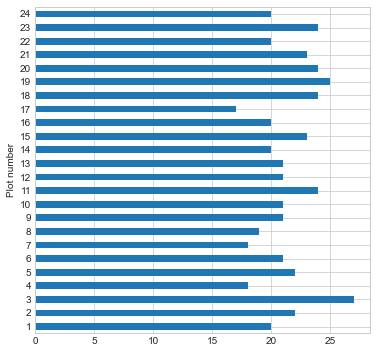

In [40]:
fig, ax = plt.subplots(figsize=(6, 6))
n_species_per_plot.plot(kind="barh", ax=ax)
ax.set_ylabel("Plot number");

In [41]:
# Alternative option to calculate the species per plot:
# inspired on the pivot table we already had:
# species_per_plot = survey_data.reset_index().pivot_table(
#      index="name", columns="verbatimLocality", values="ID", aggfunc='count')
# n_species_per_plot = species_per_plot.count()

<div class="alert alert-success">

**EXERCISE**

- What is the number of plots (`verbatimLocality`) each of the species have been observed in? Assign the output to a new variable `n_plots_per_species`. Sort the counts from low to high.
- Make an horizontal bar chart using Pandas `plot` function to show the number of plots each of the species was found (using the `n_plots_per_species` variable).  

<details><summary>Hints</summary>

- Use the previous exercise to solve this one.
    
</details>

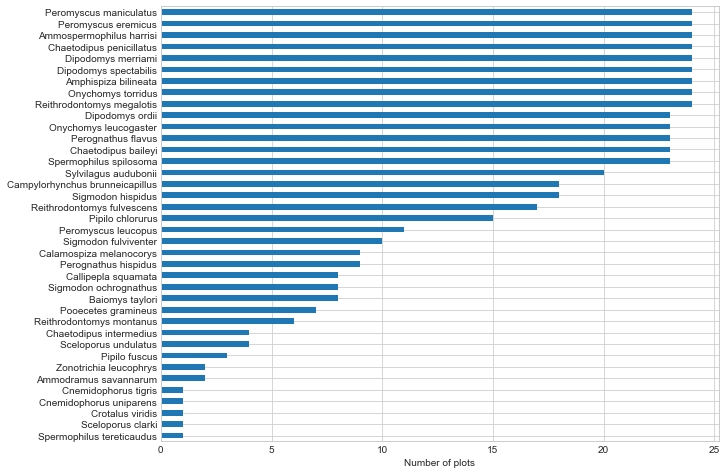

In [42]:
n_plots_per_species = survey_data.groupby(["name"])["verbatimLocality"].nunique().sort_values()

fig, ax = plt.subplots(figsize=(10, 8))
n_plots_per_species.plot(kind="barh", ax=ax)
ax.set_xlabel("Number of plots");
ax.set_ylabel("");

<div class="alert alert-success">

**EXERCISE**

- Starting from the `survey_data`, calculate the amount of males and females present in each of the plots (`verbatimLocality`). The result should return the counts for each of the combinations of `sex` and `verbatimLocality`. Assign to a new variable `n_plot_sex`.
- Use a `pivot_table` to convert the `n_plot_sex` DataFrame to a new DataFrame with the `verbatimLocality` as index and `male`/`female` as column names. Assign to a new variable `pivoted`.

<details><summary>Hints</summary>

- _...for each of the combinations..._ `groupby` can also be used with multiple columns at the same time.
- `reset_index()` is useful function to convert multiple indices into columns again.
    
</details>

In [43]:
n_plot_sex = survey_data.groupby(["sex", "verbatimLocality"]).size().rename("count").reset_index()
n_plot_sex.head()

,sex,verbatimLocality,count
0,female,1,792
1,female,2,838
2,female,3,809
3,female,4,825
4,female,5,494


In [44]:
pivoted = n_plot_sex.pivot_table(columns="sex", index="verbatimLocality", values="count")
pivoted.head()

sex,female,male
verbatimLocality,,
1,792,1027
2,838,1017
3,809,742
4,825,972
5,494,552


As such, we can use the variable `pivoted` to plot the result:

<AxesSubplot:xlabel='verbatimLocality'>

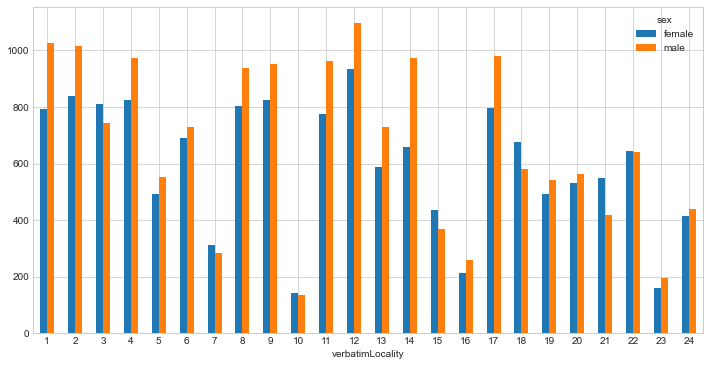

In [45]:
pivoted.plot(kind='bar', figsize=(12, 6), rot=0)

<div class="alert alert-success">

**EXERCISE**

Recreate the previous plot with the `catplot` function from the Seaborn library directly starting from <code>survey_data</code>. 

<details><summary>Hints</summary>

- Check the `kind`argument of the `catplot` function to find out how to use counts to define the bars instead of a `y` value.
- To link a column to different colors, use the `hue` argument

    
</details>

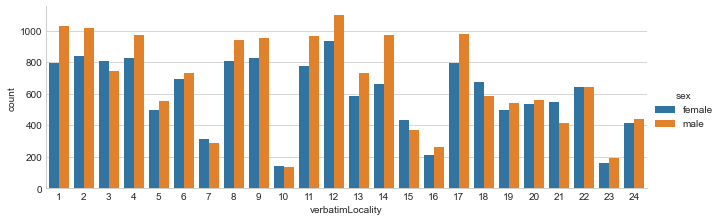

In [46]:
sns.catplot(data=survey_data, x="verbatimLocality", 
            hue="sex", kind="count", height=3, aspect=3)

<div class="alert alert-success">

**EXERCISE**

- Create a table, called `heatmap_prep`, based on the `survey_data` DataFrame with the row index the individual years, in the column the months of the year (1-> 12) and as values of the table, the counts for each of these year/month combinations.
- Using the seaborn <a href="http://seaborn.pydata.org/generated/seaborn.heatmap.html">documentation</a> make a heatmap starting from the `heatmap_prep_sns` variable.    

<details><summary>Hints</summary>

- You want to `resample` the data using the `eventDate` columns to create annual counts
- `resample` needs an aggregation function on how to combine the values within a single 'group' (in this case data within a year). In this example, we want to know the `size` of each group, i.e. the number of records within each year.
    
</details>

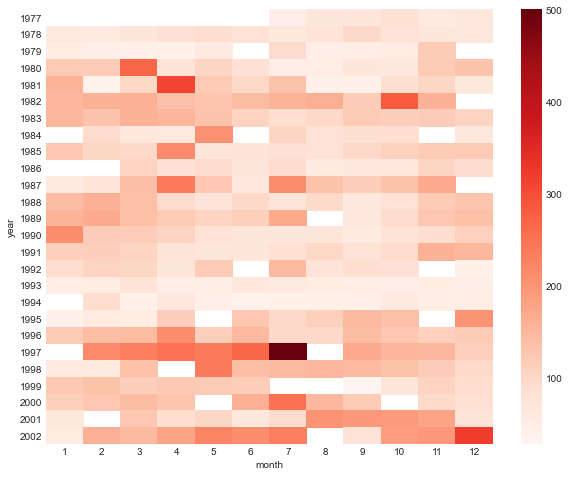

In [47]:
heatmap_prep = survey_data.pivot_table(index='year', columns='month', 
                                       values="ID", aggfunc='count')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(heatmap_prep, cmap='Reds')

Remark that we started from a `tidy` data format (also called *long* format) and converted to *short* format with in the row index the years, in the column the months and the counts for each of these year/month combinations as values.

<div class="alert alert-success">

**EXERCISE**

- Make a summary table with the number of records of each of the species in each of the plots (called `verbatimLocality`)? Each of the species `name`s is a row index and each of the `verbatimLocality` plots is a column name.
- Using the Seaborn <a href="http://seaborn.pydata.org/generated/seaborn.heatmap.html">documentation</a> to make a heatmap.

<details><summary>Hints</summary>

    
</details>

In [48]:
species_per_plot = survey_data.reset_index().pivot_table(index="name", 
                                                         columns="verbatimLocality", 
                                                         values="ID", 
                                                         aggfunc='count')
species_per_plot.head()

verbatimLocality,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
name,,,,,,,,,,,,,,,,,,,,,
Ammodramus savannarum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Ammospermophilus harrisi,5.0,6.0,2.0,2.0,3.0,6.0,21.0,10.0,14.0,1.0,...,70.0,8.0,27.0,12.0,9.0,28.0,16.0,4.0,19.0,17.0
Amphispiza bilineata,5.0,10.0,10.0,3.0,2.0,14.0,18.0,6.0,8.0,6.0,...,8.0,8.0,3.0,8.0,11.0,22.0,6.0,10.0,14.0,14.0
Baiomys taylori,1.0,1.0,18.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,15.0,1.0,3.0,NaN,NaN,NaN
Calamospiza melanocorys,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN


<AxesSubplot:xlabel='verbatimLocality', ylabel='name'>

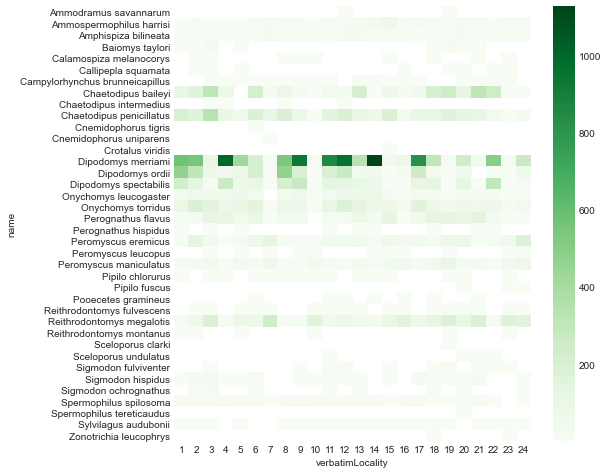

In [49]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(species_per_plot, ax=ax, cmap='Greens')

<div class="alert alert-success">

**EXERCISE**

Make a plot visualizing the evolution of the number of observations for each of the individual __years__ (i.e. annual counts) using the `resample` method.

<details><summary>Hints</summary>

- You want to `resample` the data using the `eventDate` column to create annual counts. If the index is not a datetime-index, you can use the `on=` keyword to specify which datetime column to use.
- `resample` needs an aggregation function on how to combine the values within a single 'group' (in this case data within a year). In this example, we want to know the `size` of each group, i.e. the number of records within each year.
    
</details>

<AxesSubplot:xlabel='eventDate'>

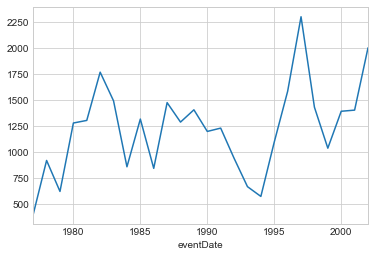

In [50]:
survey_data.resample('A', on='eventDate').size().plot()

## (OPTIONAL SECTION) Evolution of species during monitoring period

*In this section, all plots can be made with the embedded Pandas plot function, unless specificly asked*

<div class="alert alert-success">

**EXERCISE**

Plot using Pandas `plot` function the number of records for `Dipodomys merriami` for each month of the year (January (1) -> December (12)), aggregated over all years.

<details><summary>Hints</summary>

- _...for each month of..._ requires `groupby`. 
- `resample` is not useful here, as we do not want to change the time-interval, but look at month of the year (over all years)
    
</details>

In [51]:
merriami = survey_data[survey_data["name"] == "Dipodomys merriami"]

Text(0, 0.5, 'Month of the year')

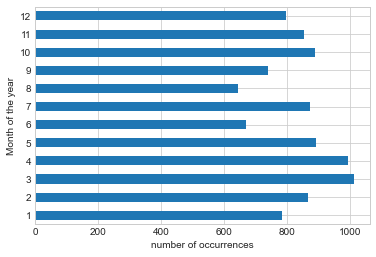

In [52]:
fig, ax = plt.subplots()
merriami.groupby(merriami['eventDate'].dt.month).size().plot(kind="barh", ax=ax)
ax.set_xlabel("number of occurrences")
ax.set_ylabel("Month of the year")

<div class="alert alert-success">

**EXERCISE**

Plot, for the species 'Dipodomys merriami', 'Dipodomys ordii', 'Reithrodontomys megalotis' and 'Chaetodipus baileyi', the monthly number of records as a function of time for the whole monitoring period. Plot each of the individual species in a separate subplot and provide them all with the same y-axis scale

<details><summary>Hints</summary>

- `groupby` is not useful here, as we do want to change the time-interval to represent data as a function of time
    
</details>

In [53]:
subsetspecies = survey_data[survey_data["name"].isin(['Dipodomys merriami', 'Dipodomys ordii',
                                                      'Reithrodontomys megalotis', 'Chaetodipus baileyi'])]

In [54]:
month_evolution = subsetspecies.groupby("name").resample('M', on='eventDate').size()

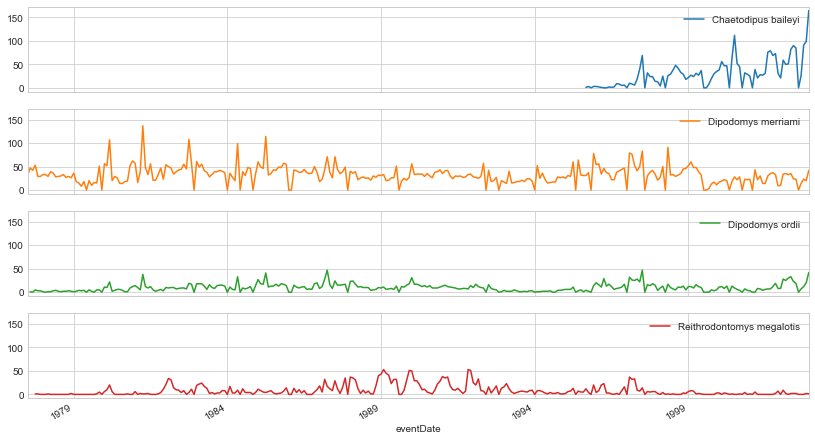

In [55]:
species_evolution = month_evolution.unstack(level=0)
axs = species_evolution.plot(subplots=True, figsize=(14, 8), sharey=True)

<div class="alert alert-success">

**EXERCISE**

Recreate the same plot as in the previous exercise using Seaborn `relplot` functon with the `month_evolution` variable.

<details><summary>Hints</summary>


    
</details>

In [56]:
# Given as solution..
subsetspecies = survey_data[survey_data["name"].isin(['Dipodomys merriami', 'Dipodomys ordii',
                                                      'Reithrodontomys megalotis', 'Chaetodipus baileyi'])]
month_evolution = subsetspecies.groupby("name").resample('M', on='eventDate').size().rename("counts")
month_evolution = month_evolution.reset_index()

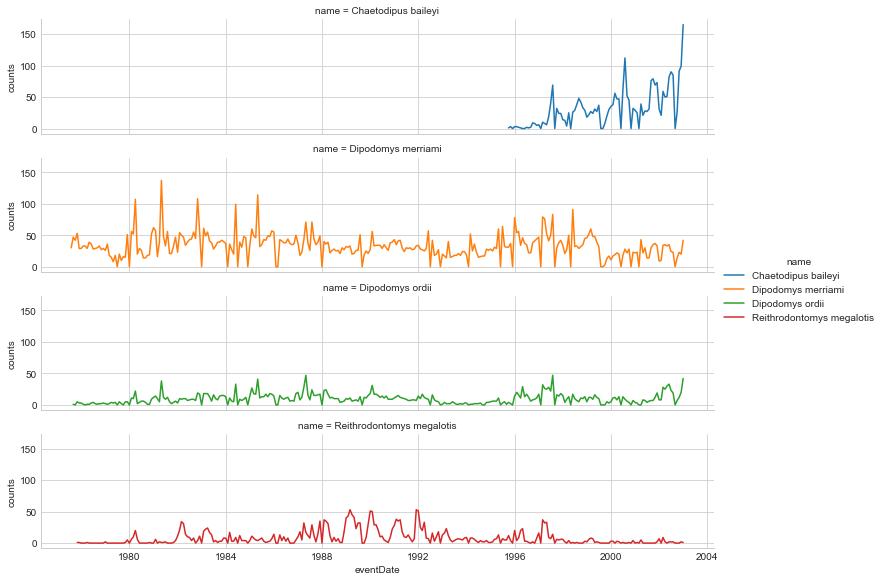

In [57]:
sns.relplot(data=month_evolution, x='eventDate', y="counts", 
            row="name", kind="line", hue="name", height=2, aspect=5)

<div class="alert alert-success">

**EXERCISE**

Plot the annual amount of occurrences for each of the 'taxa' as a function of time using Seaborn. Plot each taxa in a separate subplot and do not share the y-axis among the facets.

<details><summary>Hints</summary>

- Combine `resample` and `groupby`!
- Check out the previous exercise for the plot function.
- Pass the `sharey=False` to the `facet_kws` argument as a dictionary.
    
</details>

In [58]:
year_evolution = survey_data.groupby("taxa").resample('A', on='eventDate').size()
year_evolution.name = "counts"
year_evolution = year_evolution.reset_index()

In [59]:
year_evolution.head()

,taxa,eventDate,counts
0,Bird,1980-12-31,17
1,Bird,1981-12-31,8
2,Bird,1982-12-31,31
3,Bird,1983-12-31,31
4,Bird,1984-12-31,16


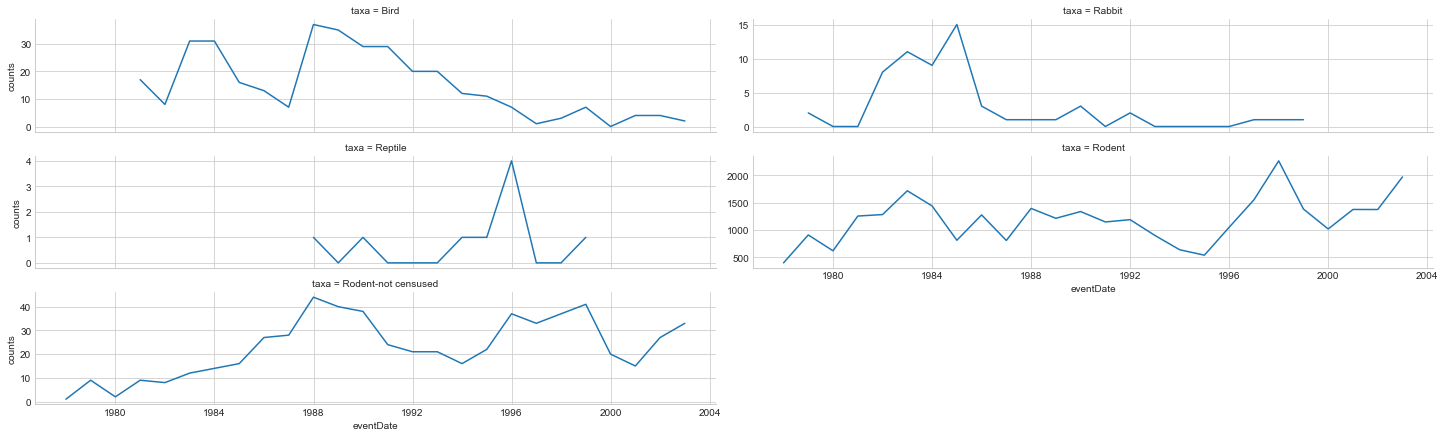

In [60]:
sns.relplot(data=year_evolution, x='eventDate', y="counts", 
            col="taxa", col_wrap=2, kind="line", height=2, aspect=5, 
            facet_kws={"sharey": False})

<div class="alert alert-success">

**EXERCISE**

The observations where taken by volunteers. You wonder on which day of the week the most observations where done. Calculate for each day of the week (`weekday`) the number of observations and make a barplot.

<details><summary>Hints</summary>

- You can do this! 
    
</details>

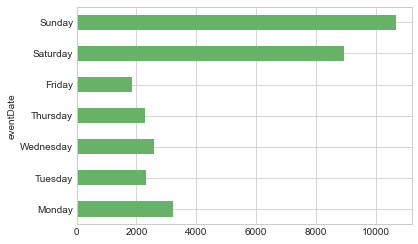

In [61]:
fig, ax = plt.subplots()
survey_data.groupby(survey_data["eventDate"].dt.weekday).size().plot(kind='barh', color='#66b266', ax=ax)
xticks = ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', "Thursday", "Friday", "Saturday", "Sunday"])

Nice work!